@ Written by Saber Kazeminasab Hashemabad, January 2024. Schepens Eye Reseach Institute, Mass Eye and Ear Institute, Harvard Medical School, Boston, MA


This notebook presents a deep learning model to adjust the cup to disc ratio (CDR) based on the polygenic risk score (PRS). To this aim a two-phase training is proposed:
1. At first, a classifier model is trained to clssify the eyes to normal and glaucomotous ones based on international classification of disease (ICD) codes (classification mode).
   1.1. In this mode, the raw CDR and the PRS are the input to the model and the ICD codes are output. 
2. Then the last layer of the classifier model is removed and a layer for adjusted cdr prediction is replaced (regression mode) 
   2.1. In this mode, the raw CDRs and the PRSs are the inupt to the model and the adjusted CDRs are the outputs. The     adjusted CDRs are the CDRs for the patients where they comply with the 0.6 cutoff criterion (i.e., if their value is less than 0.6: the ICD code is 0, and if their value is higher than 0.6L their ICD code is higher 0.6 )

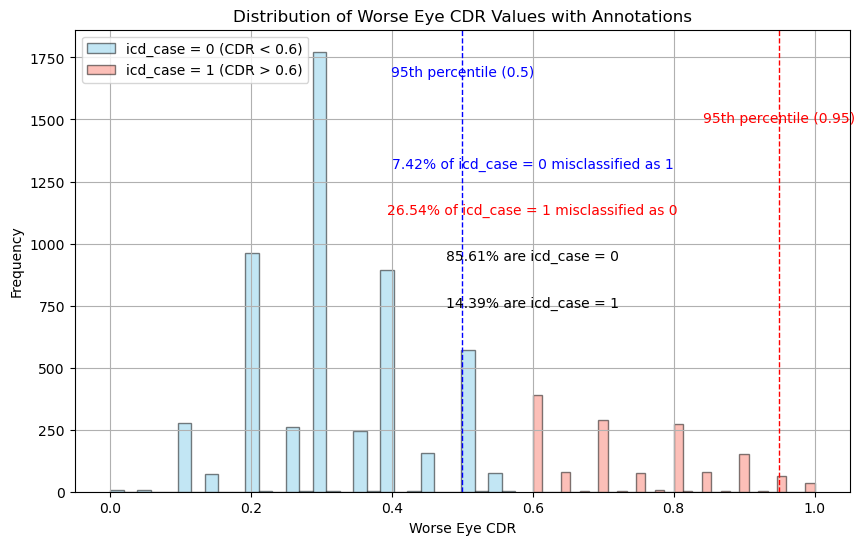

In [4]:
#Statistics of the dataset
from lib.data_analysis import DataAnalysis

analysis = DataAnalysis(file_path='cleaned_data_icd_case.csv')
analysis.load_data()
analysis.calculate_statistics()
analysis.plot_data()

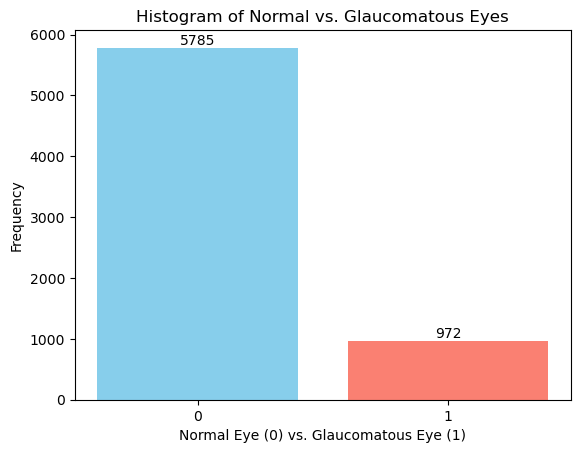

In [7]:
# the number of samples for the class 0 (normal eyes) and class 1 (glacumotous eyes).
from lib.eye_condition_analysis import EyeConditionAnalysis
analysis = EyeConditionAnalysis(file_path='cleaned_data_icd_case.csv')
analysis.load_data()
analysis.plot_frequency()

In [1]:
from lib.demographic_analysis import DemographicAnalysis

analysis = DemographicAnalysis('cleaned_data_icd_case.csv')
analysis.process_data()
analysis.print_statistics()

The ratio of female sex is: 0.53
The mean of age is: 68.20 and the standard deviation is: 14.33
The proportion of each race in the dataframe:
EUR: 0.87
AMR: 0.06
AFR: 0.05
Asian: 0.02


In [3]:
from lib.classifier_dataset_preparation import DatasetPreparation
preparation = DatasetPreparation('cleaned_data_icd_case.csv')
preparation.prepare_datasets()
preparation.print_summary()

the length of manual values: 399, and the length of non-manual values: 6358
The shape of train dataset is (5086, 2), y_train: (5086,), X_val: (1272, 2), y_val: (1272,)
Training set X shape: (5086, 2), Training set y shape: (5086,)
Validation set X shape: (1272, 2), Validation set y shape: (1272,)


In [6]:
from models.classifier_model import ClassifierModel
# Instantiate the model with custom parameters
my_model = ClassifierModel()
# Retrieve the actual Keras model
model = my_model.get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr_input (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 prs_input (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 2)            0           ['cdr_input[0][0]',              
                                                                  'prs_input[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 64)           192         ['concatenate[0][0]']        

In [12]:
preparation.X_train.keys()

Index(['cdr', 'PRS_noPOAG'], dtype='object')

0.9999 0.9999
Epoch 1/400
636/636 [==============================] - 3s 3ms/step - loss: 109.6755 - auc: 0.6175 - val_loss: 0.6185 - val_auc: 0.8015
Epoch 2/400
636/636 [==============================] - 1s 2ms/step - loss: 91.0794 - auc: 0.7348 - val_loss: 0.5394 - val_auc: 0.8134
Epoch 3/400
636/636 [==============================] - 1s 2ms/step - loss: 85.4525 - auc: 0.7616 - val_loss: 0.4805 - val_auc: 0.8176
Epoch 4/400
636/636 [==============================] - 1s 2ms/step - loss: 84.0369 - auc: 0.7592 - val_loss: 0.4625 - val_auc: 0.8177
Epoch 5/400
636/636 [==============================] - 1s 2ms/step - loss: 83.8885 - auc: 0.7547 - val_loss: 0.4433 - val_auc: 0.8183
Epoch 6/400
636/636 [==============================] - 1s 2ms/step - loss: 84.2105 - auc: 0.7562 - val_loss: 0.4430 - val_auc: 0.8200
Epoch 7/400
636/636 [==============================] - 1s 2ms/step - loss: 83.8531 - auc: 0.7621 - val_loss: 0.4560 - val_auc: 0.8213
Epoch 8/400
636/636 [==========================

636/636 [==============================] - 2s 2ms/step - loss: 78.8332 - auc: 0.7896 - val_loss: 0.4347 - val_auc: 0.8258
Epoch 122/400
636/636 [==============================] - 1s 2ms/step - loss: 79.1797 - auc: 0.7857 - val_loss: 0.4224 - val_auc: 0.8245
Epoch 123/400
636/636 [==============================] - 2s 2ms/step - loss: 78.8003 - auc: 0.7898 - val_loss: 0.4291 - val_auc: 0.8247
Epoch 124/400
636/636 [==============================] - 1s 2ms/step - loss: 79.5685 - auc: 0.7806 - val_loss: 0.4264 - val_auc: 0.8248
Epoch 125/400
636/636 [==============================] - 2s 2ms/step - loss: 78.0389 - auc: 0.7922 - val_loss: 0.4353 - val_auc: 0.8244
Epoch 126/400
636/636 [==============================] - 2s 2ms/step - loss: 78.9042 - auc: 0.7908 - val_loss: 0.4208 - val_auc: 0.8250
Epoch 127/400
636/636 [==============================] - 1s 2ms/step - loss: 77.7651 - auc: 0.7962 - val_loss: 0.4264 - val_auc: 0.8246
Epoch 128/400
636/636 [==============================] - 2s 2m

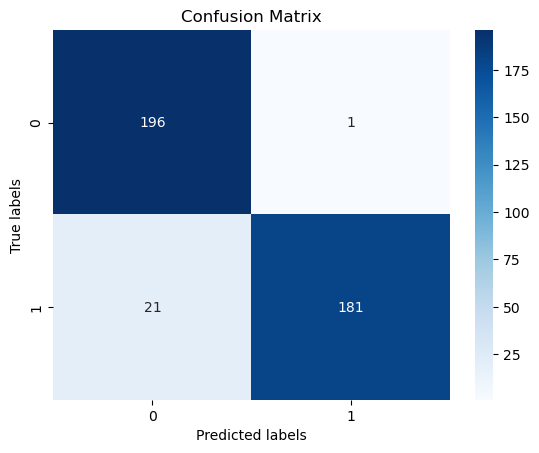

Accuracy: 0.945
              precision    recall  f1-score   support

     Class 0       0.90      0.99      0.95       197
     Class 1       0.99      0.90      0.94       202

    accuracy                           0.94       399
   macro avg       0.95      0.95      0.94       399
weighted avg       0.95      0.94      0.94       399



In [8]:
#model training for the classifier model.
class_weights = {0: 100, 1: 500}  # weighted loss function

# Model training
history = model.fit(
    [X_train_cdr, X_train_PRS], 
    y_train, 
    validation_data=([X_val_cdr, X_val_PRS], y_val), 
    epochs=400, 
    batch_size=8, 
    class_weight=class_weights,  # Use class weights
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)]
)

icd_cases_on_training=[]
for i in predictions:
    if i>=0.6:
        icd_cases_on_training.append(1)
    else:
        icd_cases_on_training.append(0)
# Now generate the confusion matrix
cm = confusion_matrix(y_test, icd_cases_on_training)
# Plot using seaborn for a nicer-looking confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report, accuracy_score

# Assuming y_true are the true labels and y_pred are the predicted labels from your model


# Calculate accuracy
accuracy = accuracy_score(y_test, icd_cases_on_training)
print(f"Accuracy: {accuracy:.3f}")

# Generate a classification report
report = classification_report(y_test,icd_cases_on_training, target_names=['Class 0', 'Class 1'])
print(report) #maci

In [11]:
#Here the regressor model for predicting the adjusted CDR is constructed based on the classifier model.
from models.regressor_model import ModifiedClassifierModel

modified_classifier_model = ModifiedClassifierModel()

# Access the modified model for further use, such as training or evaluation
new_model = modified_classifier_model.new_model

# Example: Display the model's architecture
new_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr_input (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 prs_input (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 2)            0           ['cdr_input[0][0]',              
                                                                  'prs_input[0][0]']              
                                                                                                  
 dense_8 (Dense)                (None, 64)           192         ['concatenate_2[0][0]']    

In [10]:
#dataset construction for the regressor model training. the adjusted CDRs are based on the 0.6 cutoff criterion. 
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data_without_manual_review.csv'
data = pd.read_csv(file_path)
data_for_funtuning=[]
# Check if the required columns are present
if 'icd_case' in data.columns and 'recent_cdr' in data.columns :
    # Separate the true labels and the predicted probabilities
    cdr = data['recent_cdr']
    for i in range(len(data)):
        condition1=data.iloc[i]['recent_cdr']>=0.6 and data.iloc[i]['icd_case']==1
        condition2=data.iloc[i]['recent_cdr']<0.6 and data.iloc[i]['icd_case']==0
        if condition1 or condition2:
            data_for_funtuning.append([data.iloc[i]['recent_cdr'],data.iloc[i]['recent_PRS_noPOAG'],data.iloc[i]['icd_case']])
            

print(len(data_for_funtuning))
data_for_funtuning_df=pd.DataFrame(data_for_funtuning,columns=['cdr','PRS','icd_case'])
# Split the data into features and target
X = data_for_funtuning_df[['cdr', 'PRS']]  # Features DataFrame
y = data_for_funtuning_df['cdr']  # Target Series

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the input features for training
X_train_cdr = X_train['cdr'].values
X_train_prs = X_train['PRS'].values

# Separate the input features for validation
X_val_cdr = X_val['cdr'].values
X_val_prs = X_val['PRS'].values

# Convert inputs to the correct format for the model
X_train_2 = [X_train_cdr, X_train_prs]
X_val_2 = [X_val_cdr, X_val_prs]

X_train=np.array(X_train)

X_val=np.array(X_val)
y_train=np.array(y_train)
y_val=np.array(y_val)
print(f'The shape if train dataset is {X_train_cdr.shape}, y_train: {X_train_prs.shape},X_val: {X_val_cdr.shape}, y_val: {X_val_prs.shape}')

5606
The shape if train dataset is (4484,), y_train: (4484,),X_val: (1122,), y_val: (1122,)


(4484,) (4484,) (1122,) (1122,)
Epoch 1/100
141/141 [==============================] - 1s 2ms/step - loss: 0.4576 - r2_score: -17.7581 - val_loss: 0.1043 - val_r2_score: -2.7168
Epoch 2/100
 39/141 [=======>......................] - ETA: 0s - loss: 0.2003 - r2_score: -7.8079

C:\Users\skaze\anaconda3\lib\site-packages\keras\engine\training.py:2086: UserWarning: Metric R2Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


141/141 [==============================] - 0s 2ms/step - loss: 0.1974 - r2_score: -7.0994 - val_loss: 0.0528 - val_r2_score: -0.8794
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.1487 - r2_score: -5.1173 - val_loss: 0.0341 - val_r2_score: -0.2147
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.0959 - r2_score: -2.9122 - val_loss: 0.0219 - val_r2_score: 0.2182
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.0654 - r2_score: -1.6719 - val_loss: 0.0157 - val_r2_score: 0.4422
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.0459 - r2_score: -0.8765 - val_loss: 0.0106 - val_r2_score: 0.6214
Epoch 7/100
141/141 [==============================] - 0s 1ms/step - loss: 0.0332 - r2_score: -0.3691 - val_loss: 0.0082 - val_r2_score: 0.7073
Epoch 8/100
141/141 [==============================] - 0s 2ms/step - loss: 0.0263 - r2_score: -0.0718 - val_loss: 0.0057 - val_r2_score: 0.7980
Ep

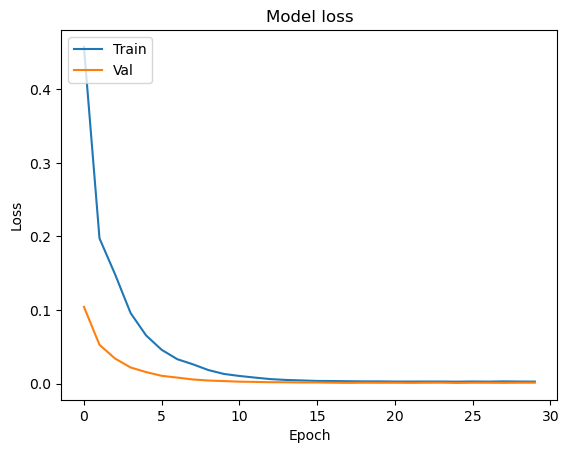

 1/13 [=>............................] - ETA: 2s - loss: 6.9798e-04 - r2_score: 0.9881

C:\Users\skaze\anaconda3\lib\site-packages\keras\engine\training.py:2086: UserWarning: Metric R2Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


13/13 [==============================] - 0s 1ms/step - loss: 6.6665e-04 - r2_score: 0.9888
Test Loss: 0.0007
Test Metric: 0.9888


In [11]:
#regressor model training
from tensorflow.keras.callbacks import EarlyStopping
# Define the number of epochs and batch size
epochs = 100
batch_size = 32
print(X_train_cdr.shape,X_train_prs.shape,X_val_cdr.shape,X_val_prs.shape)

# Define EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history = new_model.fit(
    [X_train_cdr, X_train_prs],
    X_train_cdr,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=([X_val_cdr, X_val_prs], X_val_cdr),
    callbacks=[early_stopping_callback]  # Add the callback here
)
# Plot the training history
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
# Assuming X_test_cdr and X_test_prs are your test features
X_test = [X_test_cdr, X_test_prs]

# Evaluate the model on the test data
test_loss, test_metric = new_model.evaluate(X_test, X_test_cdr, verbose=1)

# Print the results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Metric: {test_metric:.4f}')  # Replace 'Test Metric' with the name of your metric, e.g., 'R2 Score'


In [17]:
# some examples of the model performance
X_test = data_with_manual_review[['recent_cdr', 'recent_PRS_noPOAG']]
# Fit the scaler to the training data and transform the training data
X_test_cdr = X_test[['recent_cdr']]
print(X_test[['recent_PRS_noPOAG']].shape)
# X_test_cdr = X_test['cdr']
X_test_prs=X_test[['recent_PRS_noPOAG']]
# Redefining icd_case based on the 'worseeye_cdr' value
data_with_manual_review['redefined_icd_case'] = data_with_manual_review['recent_cdr'].apply(lambda x: 0 if x < 0.6 else 1)
y1 = data_with_manual_review['redefined_icd_case']
y_test=y1.astype('float')
# Evaluate the model
eval_results = model.evaluate([X_test_cdr, X_test_prs], y_test, verbose=1)
# Use model.predict with the correct input format
predictions = model.predict([X_test_cdr, X_test_prs])
# Print the evaluation results
print(f"Test Loss: {eval_results[0]}")
print(f"Test AUC: {eval_results[1]}")
print(predictions[:20],y_test[:20])

(399, 1)
13/13 [==============================] - 0s 1ms/step
Test Loss: 0.24729561805725098
Test AUC: 0.9988633394241333
[[0.2536439 ]
 [0.13799053]
 [0.9053817 ]
 [0.476976  ]
 [0.19490004]
 [0.17819077]
 [0.65935755]
 [0.181104  ]
 [0.3206594 ]
 [0.85817146]
 [0.9289915 ]
 [0.7178171 ]
 [0.75695735]
 [0.35450348]
 [0.19426957]
 [0.81937647]
 [0.27295455]
 [0.8614915 ]
 [0.8974412 ]
 [0.16443828]] 40     0.0
60     0.0
67     1.0
70     0.0
72     0.0
91     0.0
93     1.0
98     0.0
104    0.0
113    1.0
115    1.0
125    1.0
126    1.0
129    0.0
145    0.0
150    1.0
153    0.0
171    1.0
180    1.0
206    0.0
Name: redefined_icd_case, dtype: float64


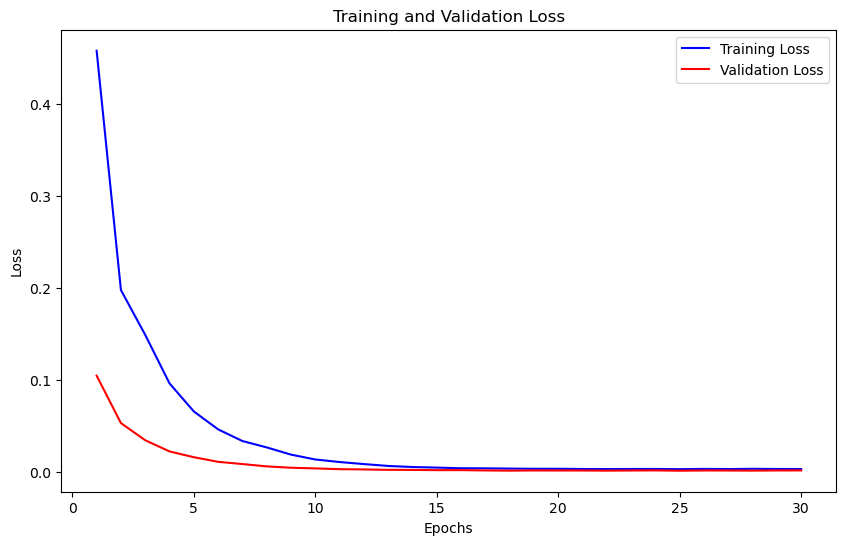

In [12]:
import matplotlib.pyplot as plt
# Extracting loss and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
